In [264]:
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

iris = load_iris()


In [15]:
iris_df = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

iris_df.head(3)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [16]:
KM = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)

In [18]:
KM.fit(iris_df)

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [21]:
KM.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [25]:
iris_df['target'] = iris.target
iris_df['cluster'] = KM.labels_
iris_df.groupby(['target', 'cluster'])['sepal_length'].count()

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64

# silhoute 계수 측정

In [32]:
from sklearn.metrics import silhouette_score, silhouette_samples
score_samples = silhouette_samples(iris.data, iris_df['cluster'])
score_samples
iris_df['silhouette'] = score_samples                                      
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouette
0,5.1,3.5,1.4,0.2,0,1,0.852582
1,4.9,3.0,1.4,0.2,0,1,0.814916
2,4.7,3.2,1.3,0.2,0,1,0.828797
3,4.6,3.1,1.5,0.2,0,1,0.804352
4,5.0,3.6,1.4,0.2,0,1,0.848918


In [34]:
silhouette_score(iris.data, iris_df['cluster'])

np.float64(0.5511916046195919)

# 실루엣 차트

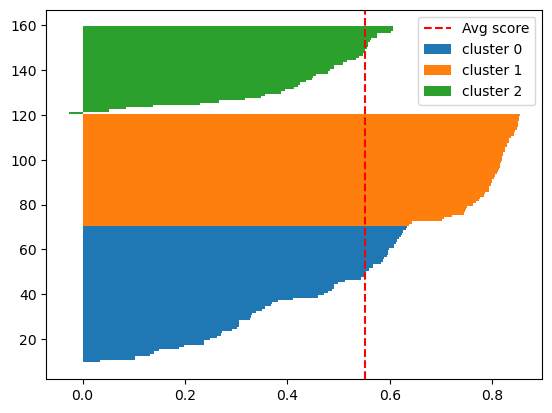

In [46]:
y_lower = 10
for i in range(3):
    cluster_i = score_samples[iris_df['cluster'] == i]
    cluster_i.sort()
    y_upper = y_lower + len(cluster_i)
    plt.barh(range(y_lower, y_upper), cluster_i, height=1.0, label=f'cluster {i}')
    y_lower = y_upper

avg_score = silhouette_score(iris.data, iris_df['cluster'])
plt.axvline(avg_score, color='red', linestyle='--', label='Avg score')
plt.legend()
plt.show()

# scree plot

In [48]:
KM.inertia_

78.85566582597728

In [56]:
scree_df = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:14

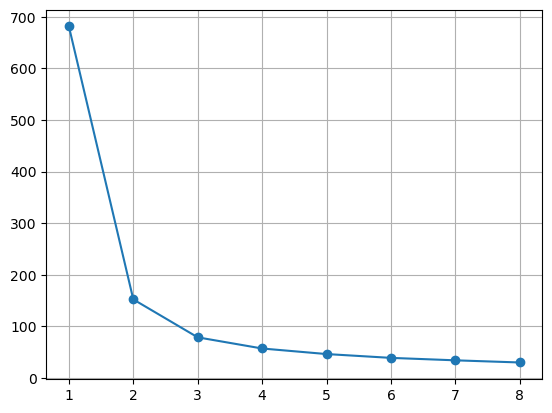

In [78]:
inertia = []
k_values = range(1, 9)
for k in k_values:
    kmeans = KMeans(n_clusters=k,n_init=10, random_state=42)
    kmeans.fit(scree_df)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.grid()
plt.show()

In [ ]:
# PCA > 2 개의 주성분을로 축소

In [82]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)
pca_transformed.shape
#150 건의 데이터가 2개로 축소

(150, 2)

In [84]:
iris_df['pca_x'] = pca_transformed[:, 0] #PCA 첫번째 속성
iris_df['pca_y'] = pca_transformed[:, 1] #PCA 두번째 속성
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouette,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,0.852582,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,0.814916,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,0.828797,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,0.804352,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,0.848918,-2.728717,0.326755


# PCA 결과를 시각화

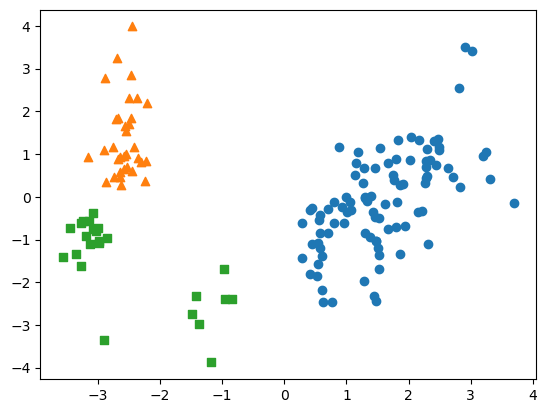

In [156]:
plt.scatter(x=iris_df.loc[iris_df['cluster'] == 0, 'pca_x'],
            y=iris_df.loc[iris_df['cluster'] == 0, 'pca_y'], marker='o')
plt.scatter(x=iris_df.loc[iris_df['cluster'] == 1, 'pca_x'],
            y=iris_df.loc[iris_df['cluster'] == 1, 'pca_y'], marker='^')
plt.scatter(x=iris_df.loc[iris_df['cluster'] == 2, 'pca_x'],
            y=iris_df.loc[iris_df['cluster'] == 2, 'pca_y'], marker='s')

plt.show()


# StandardScalere  스케일링
# PCA 2개로 축소

In [95]:
scaler = StandardScaler()
# StandardScaler  스케일링
# PCA 2개로 축소    

In [97]:
scaled_data = scaler.fit_transform(iris.data)

scaled_data[:5] 
pca_transformed_scaled = pca.fit_transform(scaled_data)

iris_df['pca_x_scaled'] = pca_transformed_scaled[:, 0]  # PCA first component after scaling
iris_df['pca_y_scaled'] = pca_transformed_scaled[:, 1]  # PCA second component after scaling

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouette,pca_x,pca_y,pca_x_scaled,pca_y_scaled
0,5.1,3.5,1.4,0.2,0,1,0.852582,-2.684126,0.319397,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,0,1,0.814916,-2.714142,-0.177001,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,0,1,0.828797,-2.888991,-0.144949,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,0,1,0.804352,-2.745343,-0.318299,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,0,1,0.848918,-2.728717,0.326755,-2.389842,0.646835


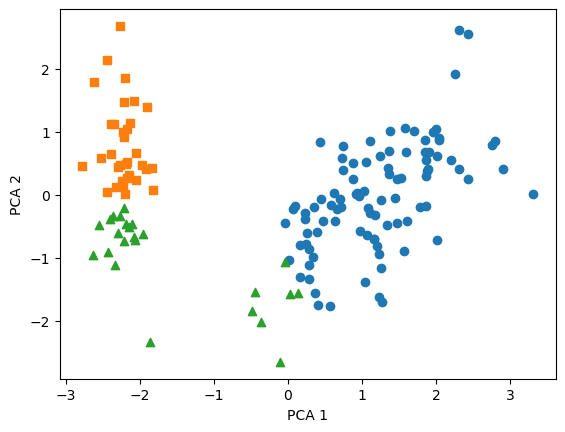

In [225]:
from sklearn.preprocessing import StandardScaler
iris_caled = StandardScaler().fit_transform(iris_df.iloc[:,:4])
iris_caled[:3]

from sklearn.decomposition import PCA
pca_scaled = PCA(n_components=2)
pca_transformed_scaled =  pca_scaled.fit_transform(iris_caled)
#주성분1, 주성분2
iris_df['pca_scaled_x'] = pca_transformed_scaled[:, 0]
iris_df['pca_scaled_y'] = pca_transformed_scaled[:, 1]
iris_df.head()

plt.scatter(x=iris_df.loc[iris_df['cluster']==0, 'pca_scaled_x'], y=iris_df.loc[iris_df['cluster']==0, 'pca_scaled_y'], marker='o')
plt.scatter(x=iris_df.loc[iris_df['cluster']==1, 'pca_scaled_x'], y=iris_df.loc[iris_df['cluster']==1, 'pca_scaled_y'], marker='s')
plt.scatter(x=iris_df.loc[iris_df['cluster']==2, 'pca_scaled_x'], y=iris_df.loc[iris_df['cluster']==2, 'pca_scaled_y'], marker='^')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()



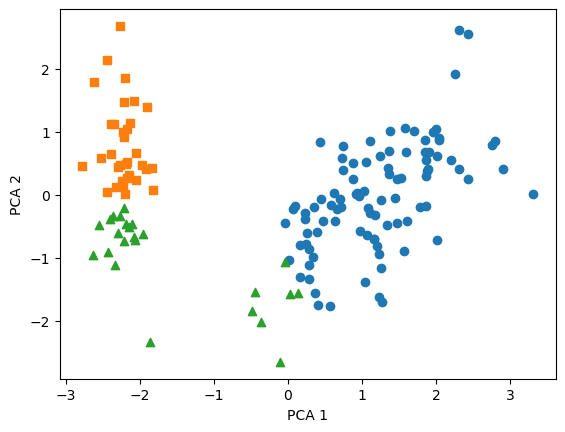

In [248]:
from sklearn.preprocessing import StandardScaler
iris_caled = StandardScaler().fit_transform(iris_df.iloc[:,:4])
iris_caled[:3]

from sklearn.decomposition import PCA
pca_scaled = PCA(n_components=2)
pca_transformed_scaled =  pca_scaled.fit_transform(iris_caled)
#주성분1, 주성분2
iris_df['pca_scaled_x'] = pca_transformed_scaled[:, 0]
iris_df['pca_scaled_y'] = pca_transformed_scaled[:, 1]
iris_df.head()

plt.scatter(x=iris_df.loc[iris_df['cluster']==0, 'pca_scaled_x'], y=iris_df.loc[iris_df['cluster']==0, 'pca_scaled_y'], marker='o')
plt.scatter(x=iris_df.loc[iris_df['cluster']==1, 'pca_scaled_x'], y=iris_df.loc[iris_df['cluster']==1, 'pca_scaled_y'], marker='s')
plt.scatter(x=iris_df.loc[iris_df['cluster']==2, 'pca_scaled_x'], y=iris_df.loc[iris_df['cluster']==2, 'pca_scaled_y'], marker='^')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [249]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [250]:
pca_scaled.explained_variance_ratio_

array([0.72962445, 0.22850762])

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


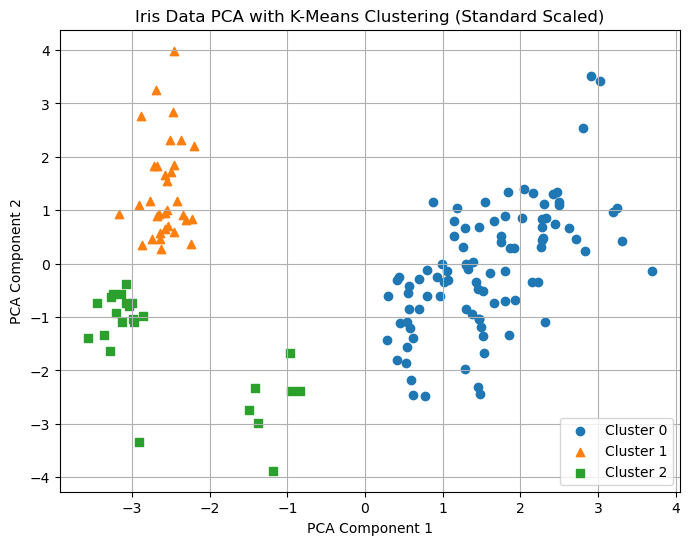

In [114]:
iris_df['target'] = iris.target

# 2. 독립 변수(피처) 추출
features = iris_df.drop('target', axis=1)

# 3. StandardScaler를 사용하여 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features) # 데이터를 표준화한다.

# 4. 스케일링된 데이터에 PCA 적용
pca = PCA(n_components=2) # 2개의 주성분으로 차원 축소
pca_components = pca.fit_transform(scaled_features) # 스케일링된 데이터를 PCA 변환한다.

# 5. PCA 결과를 데이터프레임에 추가
iris_df['pca_x'] = pca_components[:, 0]
iris_df['pca_y'] = pca_components[:, 1]

# 6. K-Means 군집화 (예시로 3개의 클러스터)
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
iris_df['cluster'] = kmeans.fit_predict(scaled_features) # 스케일링된 데이터에 군집화를 적용한다.

# 7. 시각화: 클러스터별로 마커를 다르게 하여 산점도 그리기
plt.figure(figsize=(8, 6))
plt.scatter(x=iris_df.loc[iris_df['cluster'] == 0, 'pca_x'],
            y=iris_df.loc[iris_df['cluster'] == 0, 'pca_y'],
            marker='o', label='Cluster 0')
plt.scatter(x=iris_df.loc[iris_df['cluster'] == 1, 'pca_x'],
            y=iris_df.loc[iris_df['cluster'] == 1, 'pca_y'],
            marker='^', label='Cluster 1')
plt.scatter(x=iris_df.loc[iris_df['cluster'] == 2, 'pca_x'],
            y=iris_df.loc[iris_df['cluster'] == 2, 'pca_y'],
            marker='s', label='Cluster 2')
# 원본 target 값에 따른 중심점도 표시 (선택 사항)
# for i, target_name in enumerate(iris.target_names):
#     plt.scatter(x=iris_df.loc[iris_df['target'] == i, 'pca_x'].mean(),
#                 y=iris_df.loc[iris_df['target'] == i, 'pca_y'].mean(),
#                 marker='X', s=200, color='black', label=f'True Center {target_name}')

plt.title('Iris Data PCA with K-Means Clustering (Standard Scaled)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

# 클러스터링 실습

In [159]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)


In [166]:
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


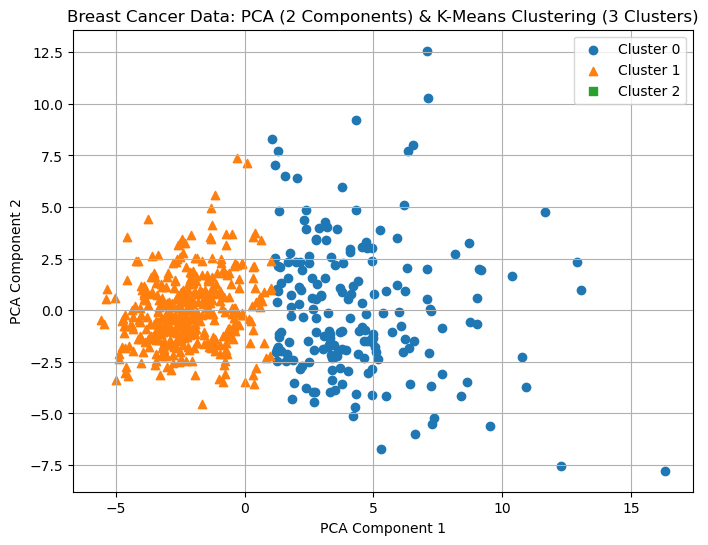

In [252]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
#cancer_df = pd.DataFrame(data=cancer.data, columns=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'])

# 2. 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cancer_df)

# 3. PCA (2개 주성분)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# PCA 결과 DataFrame에 추가
cancer_df['pca_x'] = pca_components[:, 0]
cancer_df['pca_y'] = pca_components[:, 1]

# 4. K-Means 클러스터링 (3개 군집)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=20)
cancer_df['cluster'] = kmeans.fit_predict(pca_components)

# 5. 시각화
plt.figure(figsize=(8, 6))
# 각 클러스터별로 다른 마커를 사용하여 시각화
plt.scatter(x=cancer_df.loc[cancer_df['cluster'] == 0, 'pca_x'],
            y=cancer_df.loc[cancer_df['cluster'] == 0, 'pca_y'],
            marker='o', label='Cluster 0')
plt.scatter(x=cancer_df.loc[cancer_df['cluster'] == 1, 'pca_x'],
            y=cancer_df.loc[cancer_df['cluster'] == 1, 'pca_y'],
            marker='^', label='Cluster 1')
plt.scatter(x=cancer_df.loc[cancer_df['cluster'] == 2, 'pca_x'],
            y=cancer_df.loc[cancer_df['cluster'] == 2, 'pca_y'],
            marker='s', label='Cluster 2')

plt.title('Breast Cancer Data: PCA (2 Components) & K-Means Clustering (3 Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


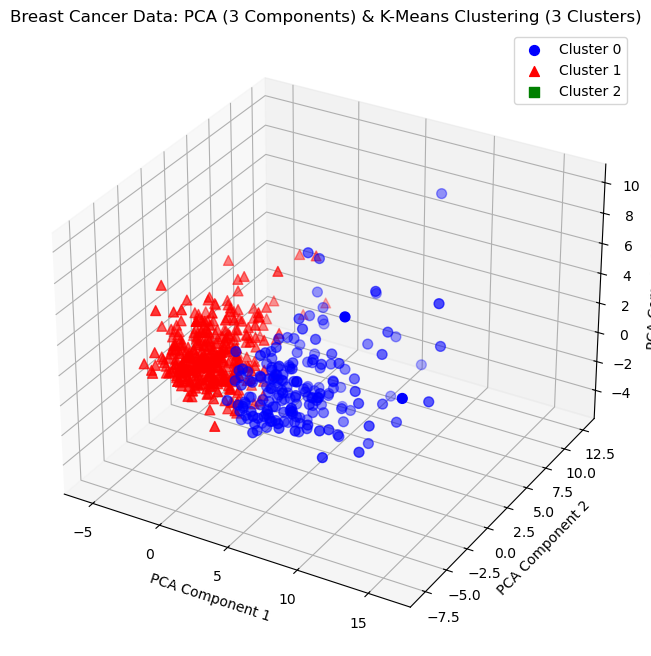

In [254]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# 2. 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cancer_df)

# 3. PCA (3개 주성분으로 변경)
pca = PCA(n_components=5) # 주성분을 3개로 설정
pca_components = pca.fit_transform(scaled_features)

# PCA 결과 DataFrame에 추가
# 3차원 데이터를 위해 'pca_z' 컬럼 추가
cancer_df['pca_x'] = pca_components[:, 0]
cancer_df['pca_y'] = pca_components[:, 1]
cancer_df['pca_z'] = pca_components[:, 2] # 세 번째 주성분 (Z축) 추가

# 4. K-Means 클러스터링 (3개 군집 유지)
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto') # n_init='auto' 권장
cancer_df['cluster'] = kmeans.fit_predict(pca_components) # 3개의 주성분 데이터를 기반으로 클러스터링 수행

# 5. 3차원 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d') # 3D 플롯을 생성

# 각 클러스터별로 다른 마커를 사용하여 시각화
cluster_colors = ['blue', 'red', 'green'] # 클러스터별 색상 지정
cluster_markers = ['o', '^', 's'] # 클러스터별 마커 지정

for i in range(3): # 0, 1, 2 클러스터에 대해 반복
    ax.scatter(cancer_df.loc[cancer_df['cluster'] == i, 'pca_x'],
               cancer_df.loc[cancer_df['cluster'] == i, 'pca_y'],
               cancer_df.loc[cancer_df['cluster'] == i, 'pca_z'], # Z축 데이터 사용
               marker=cluster_markers[i],
               color=cluster_colors[i],
               s=50, # 마커 크기
               label=f'Cluster {i}')

ax.set_title('Breast Cancer Data: PCA (3 Components) & K-Means Clustering (3 Clusters)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3') # Z축 라벨 추가
ax.legend()
plt.grid(True)
plt.show()

선택된 주요 컬럼들로 구성된 데이터 형태: (569, 8)
   mean radius  mean perimeter  mean area  mean concave points  worst radius  \
0        17.99          122.80     1001.0              0.14710         25.38   
1        20.57          132.90     1326.0              0.07017         24.99   
2        19.69          130.00     1203.0              0.12790         23.57   
3        11.42           77.58      386.1              0.10520         14.91   
4        20.29          135.10     1297.0              0.10430         22.54   

   worst perimeter  worst area  worst concave points  
0           184.60      2019.0                0.2654  
1           158.80      1956.0                0.1860  
2           152.50      1709.0                0.2430  
3            98.87       567.7                0.2575  
4           152.20      1575.0                0.1625  


C:\Users\Admin\AppData\Local\Temp\ipykernel_15900\67869199.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer_df['pca_x'] = pca_components[:, 0]
C:\Users\Admin\AppData\Local\Temp\ipykernel_15900\67869199.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer_df['pca_y'] = pca_components[:, 1]
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

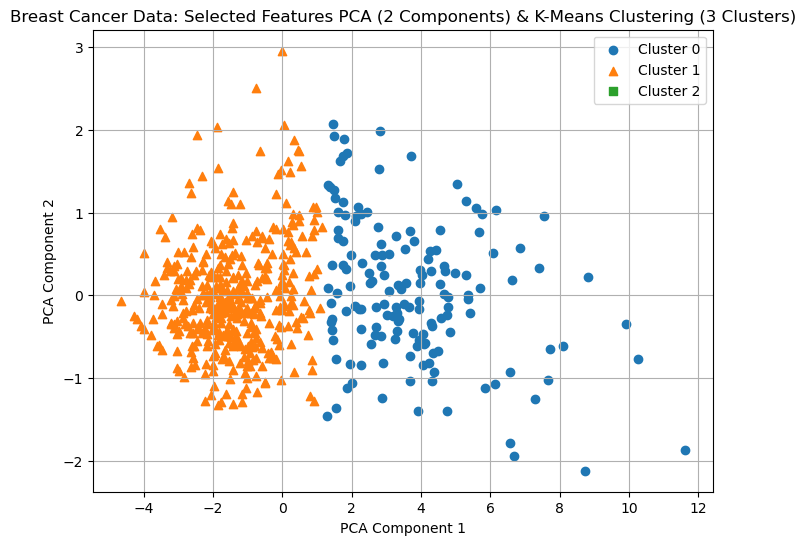

In [230]:
# 2. 클러스터링에 사용할 주요 컬럼만 선택하여 DataFrame 생성
selected_features = [
   'mean radius',
    'mean perimeter',
    'mean area',
    'mean concave points',
    'worst radius',
    'worst perimeter',
    'worst area',
    'worst concave points'
]

# cancer.data에서 해당 컬럼들만 추출
# cancer.feature_names를 먼저 DataFrame의 컬럼으로 사용하여 전체 데이터프레임을 만든 후,
# 원하는 컬럼들만 선택하는 것이 가장 안전하고 명확한 방법이다.
full_cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df = full_cancer_df[selected_features]

print("선택된 주요 컬럼들로 구성된 데이터 형태:", cancer_df.shape)
print(cancer_df.head())


# 3. 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cancer_df) # 선택된 컬럼들만 스케일링

# 4. PCA (2개 주성분)
pca = PCA(n_components=2) # 2개의 주성분으로 축소
pca_components = pca.fit_transform(scaled_features) # 스케일링된 주요 컬럼 데이터에 PCA 적용

# PCA 결과를 DataFrame에 추가
# 원본 cancer_df (선택된 컬럼들만 포함)에 새로운 PCA 컬럼 추가
cancer_df['pca_x'] = pca_components[:, 0]
cancer_df['pca_y'] = pca_components[:, 1]

# 5. K-Means 클러스터링 (2개 군집)
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
cancer_df['cluster'] = kmeans.fit_predict(pca_components) # PCA 변환된 데이터를 기반으로 클러스터링 수행

# 6. 시각화
plt.figure(figsize=(8, 6))
# 각 클러스터별로 다른 마커를 사용하여 시각화
plt.scatter(x=cancer_df.loc[cancer_df['cluster'] == 0, 'pca_x'],
            y=cancer_df.loc[cancer_df['cluster'] == 0, 'pca_y'],
            marker='o', label='Cluster 0')
plt.scatter(x=cancer_df.loc[cancer_df['cluster'] == 1, 'pca_x'],
            y=cancer_df.loc[cancer_df['cluster'] == 1, 'pca_y'],
            marker='^', label='Cluster 1')
plt.scatter(x=cancer_df.loc[cancer_df['cluster'] == 2, 'pca_x'],
            y=cancer_df.loc[cancer_df['cluster'] == 2, 'pca_y'],
            marker='s', label='Cluster 2')

plt.title('Breast Cancer Data: Selected Features PCA (2 Components) & K-Means Clustering (3 Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


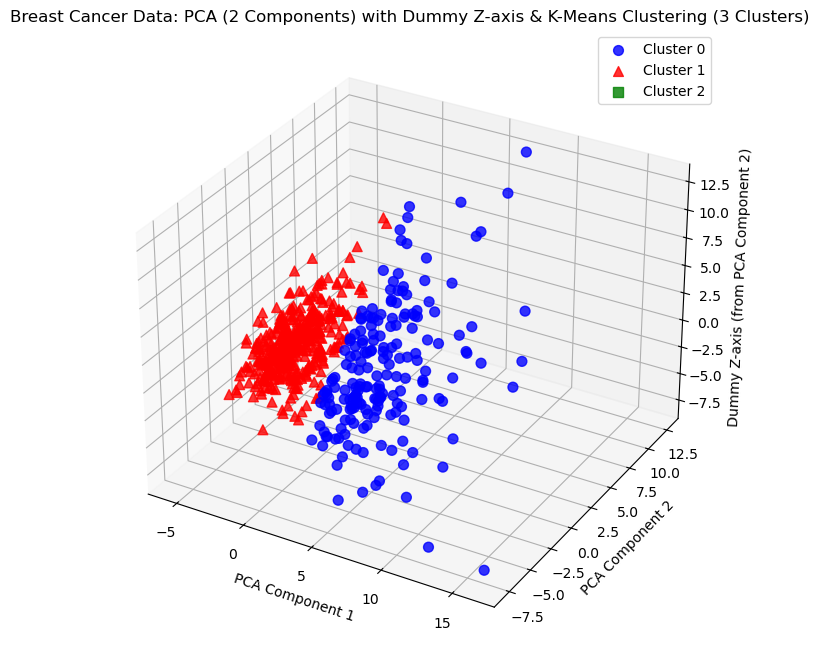

In [ ]:

cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# 2. 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cancer_df)

# 3. PCA (2개 주성분 유지)
pca = PCA(n_components=2) # 주성분을 2개로 유지
pca_components = pca.fit_transform(scaled_features)

# PCA 결과를 DataFrame에 추가
cancer_df['pca_x'] = pca_components[:, 0]
cancer_df['pca_y'] = pca_components[:, 1]
# 시각화를 위해 'pca_y' 값을 'pca_z'로 재사용 (데이터 본연의 새로운 Z축 정보는 없음)
cancer_df['pca_z'] = pca_components[:, 1] # pca_y와 동일한 값을 Z축으로 사용

# 4. K-Means 클러스터링 (3개 군집 유지)
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
cancer_df['cluster'] = kmeans.fit_predict(pca_components) # 2개의 주성분 데이터를 기반으로 클러스터링 수행

# 5. 3차원 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d') # 3D 플롯을 생성한다.

# 각 클러스터별로 다른 마커와 색상으로 시각화
cluster_colors = ['blue', 'red', 'green'] # 클러스터별 색상 지정
cluster_markers = ['o', '^', 's'] # 클러스터별 마커 지정

for i in range(3): # 0, 1, 2 클러스터에 대해 반복
    ax.scatter(cancer_df.loc[cancer_df['cluster'] == i, 'pca_x'],
               cancer_df.loc[cancer_df['cluster'] == i, 'pca_y'],
               cancer_df.loc[cancer_df['cluster'] == i, 'pca_z'], # pca_z (pca_y와 동일) 사용
               marker=cluster_markers[i],
               color=cluster_colors[i],
               s=50, # 마커 크기
               alpha=0.8, # 투명도
               label=f'Cluster {i}')

ax.set_title('Breast Cancer Data: PCA (2 Components) with Dummy Z-axis & K-Means Clustering (3 Clusters)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('Dummy Z-axis (from PCA Component 2)') # Z축 라벨 변경
ax.legend()
plt.grid(True)
plt.show()

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


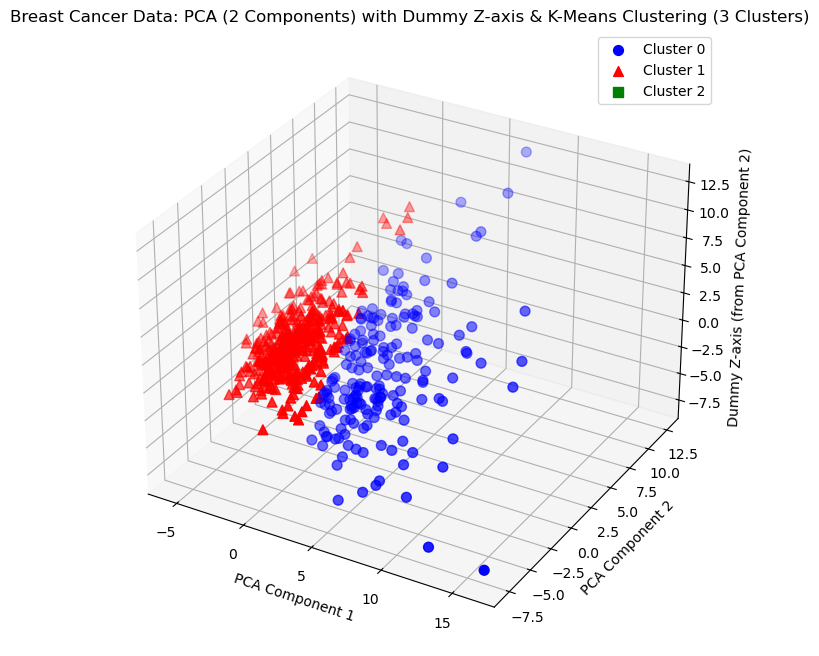

In [255]:

cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# 2. 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cancer_df)

# 3. PCA (2개 주성분 유지)
pca = PCA(n_components=15) # 주성분을 2개로 유지
pca_components = pca.fit_transform(scaled_features)

# PCA 결과를 DataFrame에 추가
cancer_df['pca_x'] = pca_components[:, 0]
cancer_df['pca_y'] = pca_components[:, 1]
# 시각화를 위해 'pca_y' 값을 'pca_z'로 재사용 (데이터 본연의 새로운 Z축 정보는 없음)
cancer_df['pca_z'] = pca_components[:, 1] # pca_y와 동일한 값을 Z축으로 사용

# 4. K-Means 클러스터링 (3개 군집 유지)
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
cancer_df['cluster'] = kmeans.fit_predict(pca_components) # 2개의 주성분 데이터를 기반으로 클러스터링 수행

# 5. 3차원 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d') # 3D 플롯을 생성한다.

# 각 클러스터별로 다른 마커와 색상으로 시각화
cluster_colors = ['blue', 'red', 'green'] # 클러스터별 색상 지정
cluster_markers = ['o', '^', 's'] # 클러스터별 마커 지정

for i in range(3): # 0, 1, 2 클러스터에 대해 반복
    ax.scatter(cancer_df.loc[cancer_df['cluster'] == i, 'pca_x'],
               cancer_df.loc[cancer_df['cluster'] == i, 'pca_y'],
               cancer_df.loc[cancer_df['cluster'] == i, 'pca_z'], # pca_z (pca_y와 동일) 사용
               marker=cluster_markers[i],
               color=cluster_colors[i],
               s=50, # 마커 크기
               label=f'Cluster {i}')

ax.set_title('Breast Cancer Data: PCA (2 Components) with Dummy Z-axis & K-Means Clustering (3 Clusters)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('Dummy Z-axis (from PCA Component 2)') # Z축 라벨 변경
ax.legend()
plt.grid(True)
plt.show()

In [257]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978,
       0.00979719, 0.00870538, 0.00804525, 0.00523366, 0.00313783])

In [266]:
pca_scaled.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [267]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [269]:
pca_3 = PCA(n_components=5)
pca_3.fit(X_scaled)
print(np.round(pca_3.explained_variance_ratio_, 3))
print(np.round(np.cumsum(pca_3.explained_variance_ratio_), 3))

[0.443 0.19  0.094 0.066 0.055]
[0.443 0.632 0.726 0.792 0.847]


In [228]:
# pca 2개의 주성분 .. 그 이상 주성분 추출
# explained_variance_ratio_이 가장 높은 주성분의 개수
# kmeans data= paa1, pca2, cluster2

In [313]:
pca_4 = PCA(n_components=5)
pca_4.fit(X_scaled)
print(np.round(pca_4.explained_variance_ratio_, 3))
print(np.round(np.cumsum(pca_4.explained_variance_ratio_), 3))
cluster_labels = kmeans.fit_predict(pca_components) # 클러스터링 결과를 변수에 저장
cancer_df['cluster'] = cluster_labels
silhouette_avg = silhouette_score(pca_components, cluster_labels)
print(f"K-Means (n_clusters=5)의 실루엣 계수: {silhouette_avg:.3f}")


[0.443 0.19  0.094 0.066 0.055]
[0.443 0.632 0.726 0.792 0.847]
K-Means (n_clusters=5)의 실루엣 계수: 0.158


c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [291]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# 2. 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cancer_df)

# 3. PCA (주성분 개수를 5로 설정)
pca = PCA(n_components=10) # 주성분을 5개로 설정
pca_components = pca.fit_transform(scaled_features)

# PCA 결과를 DataFrame에 추가 (총 5개의 주성분)
cancer_df['pca_1'] = pca_components[:, 0]
cancer_df['pca_2'] = pca_components[:, 1]
cancer_df['pca_3'] = pca_components[:, 2]
cancer_df['pca_4'] = pca_components[:, 3]
cancer_df['pca_5'] = pca_components[:, 4] # 다섯 번째 주성분 추가


# 각 주성분이 설명하는 분산 비율 확인
print("각 주성분이 설명하는 분산 비율:", np.round(pca.explained_variance_ratio_, 3))
print("누적 설명 분산 비율:", np.round(np.cumsum(pca.explained_variance_ratio_), 3))
print("-" * 30)


# 4. K-Means 클러스터링 (2개 군집)
# 클러스터링은 추출된 5개의 주성분 데이터를 기반으로 수행합니다.
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(pca_components) # 클러스터링 결과를 변수에 저장
cancer_df['cluster'] = cluster_labels


# 5. 실루엣 계수 계산 (추가된 부분)
# silhouette_score 함수는 원본 데이터(또는 PCA 변환된 데이터)와 클러스터 라벨을 입력으로 받습니다.
silhouette_avg = silhouette_score(pca_components, cluster_labels)
print(f"K-Means (n_clusters=2)의 실루엣 계수: {silhouette_avg:.3f}")
print("-" * 30)




각 주성분이 설명하는 분산 비율: [0.443 0.19  0.094 0.066 0.055 0.04  0.023 0.016 0.014 0.012]
누적 설명 분산 비율: [0.443 0.632 0.726 0.792 0.847 0.888 0.91  0.926 0.94  0.952]
------------------------------
K-Means (n_clusters=2)의 실루엣 계수: 0.358
------------------------------


c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
